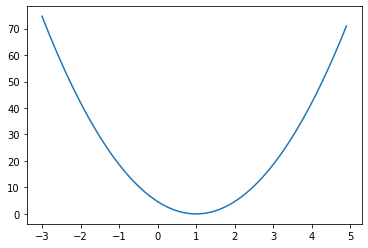

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))
sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)

plt.show()

In [7]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# tarin = optimizer.minimize(cost)

# 양의 기울기, 음의 기울기 => 0
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.7372006 [1.2294716]
1 0.20969251 [1.1223848]
2 0.05964581 [1.0652719]
3 0.016965905 [1.0348116]
4 0.0048258174 [1.0185661]
5 0.0013726545 [1.0099019]
6 0.00039044127 [1.005281]
7 0.00011105996 [1.0028166]
8 3.1591702e-05 [1.0015022]
9 8.9843525e-06 [1.0008011]
10 2.5555491e-06 [1.0004272]
11 7.263939e-07 [1.0002278]
12 2.0649709e-07 [1.0001215]
13 5.887705e-08 [1.0000648]
14 1.673186e-08 [1.0000346]
15 4.766619e-09 [1.0000185]
16 1.3635173e-09 [1.0000099]
17 3.85171e-10 [1.0000052]
18 1.032987e-10 [1.0000027]
19 2.8649083e-11 [1.0000014]
20 7.1622708e-12 [1.0000007]


In [9]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

# W = tf.Variable(5.0)
W = tf.Variable(-3.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [22]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)

hypothesis = X * W

gradient = tf.reduce_mean((W * X - Y) * X) * 2

# cst/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost, [W])

# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        gradient_val, gvs_val, _ = sess.run([gradient, gvs, apply_gradients])
        print(step, gradient_val, gvs_val)

0 37.333332 [(37.333336, 4.6266665)]
1 33.84889 [(33.84889, 4.2881775)]
2 30.689657 [(30.689657, 3.9812808)]
3 27.825287 [(27.825287, 3.703028)]
4 25.228262 [(25.228262, 3.4507453)]
5 22.873621 [(22.873623, 3.2220092)]
6 20.738752 [(20.73875, 3.0146217)]
7 18.803137 [(18.803137, 2.8265903)]
8 17.048176 [(17.048176, 2.6561086)]
9 15.457013 [(15.457014, 2.5015385)]
10 14.014359 [(14.01436, 2.361395)]
11 12.706352 [(12.706352, 2.2343314)]
12 11.520427 [(11.520427, 2.119127)]
13 10.445186 [(10.445185, 2.0146751)]
14 9.470302 [(9.470302, 1.9199722)]
15 8.586407 [(8.586407, 1.8341081)]
16 7.785009 [(7.785009, 1.756258)]
17 7.0584083 [(7.0584083, 1.685674)]
18 6.399624 [(6.399624, 1.6216778)]
19 5.8023257 [(5.8023252, 1.5636545)]
20 5.260776 [(5.260776, 1.5110468)]
21 4.7697697 [(4.7697697, 1.4633491)]
22 4.324591 [(4.324591, 1.4201032)]
23 3.9209633 [(3.9209635, 1.3808936)]
24 3.5550067 [(3.5550067, 1.3453435)]
25 3.2232056 [(3.2232056, 1.3131114)]
26 2.9223735 [(2.9223735, 1.2838877)]
27 2.